## [케라스 (Keras)](https://keras.io/)

-----

Keras는 머신 러닝 플랫폼 TensorFlow에서 실행되는 Python으로 작성된 신경망 API이다. 

- 케라스는 간결하고 직관적인 코드 구조를 가지고 있어, 초보자부터 전문가까지 다양한 사용자들이 딥러닝 모델을 구현하는 데 유용하게 활용할 수 있다.

- 빠른 실험을 가능하게 하는 데 중점을 두고 개발되었으며, 아이디어로부터 결과를 가능한 한 빨리 도출할 수 있도록 개발된 툴이다.

- Keras는 TensorFlow 2의 고수준 API이며, 현대 딥 러닝에 중점을 두고 있고, 접근하기 쉽고 생산성이 높은 인터페이스로서 머신 러닝 문제를 해결하기 할 수 있다.


한편, TensorFlow는 Google에서 개발한 오픈 소스 머신 러닝 플랫폼으로, 다음과 같은 주요 기능을 가진다.

* 저수준에서는 텐서 연산, 자동 미분, 분산 학습, GPU/TPU 실행 등을 가능하게 한다.

* 고수준에서는 케라스를 통해 빠른 프로토타이핑과 모델 관리가 가능하다

* TensorFlow 2에서는 케라스를 기본 API로 채택하여, `tf.keras` 모듈을 통해 딥러닝 모델을 손쉽게 정의하고 학습시킬 수 있다.

### 데이터

아래 예제에서는 [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)로 생성된 가상의 데이터를 통한 실습을 진행해 본다.

In [1]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_training = X[250:, :]
X_testing = X[:250, :]
Targets_training = targets[250:]
Targets_testing = targets[:250]

Feature variable인 `X`가 2차원인 데이터이다. 

Target인 y는 두 개의 클래스로 구성되어 있다.

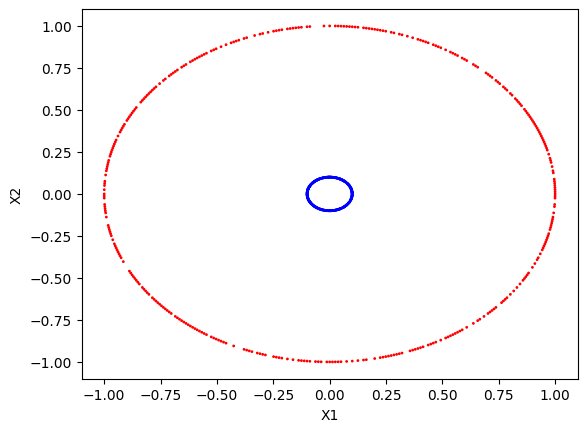

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X_training[:,0], X_training[:,1], (Targets_training == 0).astype(float), color='red')
plt.scatter(X_training[:,0], X_training[:,1], (Targets_training == 1).astype(float), color='blue')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Sequential model

Keras의 핵심 데이터 구조는 layer와 model이다.

[`tensorflow.keras.Sequential`](https://keras.io/api/models/sequential/) : 가장 간단한 모델 유형으로, layer를 선형으로 쌓은 구조이다. 즉, 각 layer가 하나의 입력과 하나의 출력만을 갖고, 순차적으로 연결된다.

더 복잡한 아키텍처의 경우 layer의 임의 그래프를 작성하거나 서브 클래스를 통해 처음부터 완전히 모델을 작성할 수있는 Keras 기능 (functional) API를 사용해야 한다.

다음은 sequential 모델의 예시이다.

In [3]:
from tensorflow.keras import Sequential

model = Sequential()

In [4]:
type(model)

keras.engine.sequential.Sequential

In [5]:
# 아래와 같이 생성하기도 한다.
import tensorflow as tf
model = tf.keras.Sequential()

## [Layer](https://keras.io/api/layers/base_layer/#layer-class)

층 (layer)은 Keras에서 신경망의 기본 구성 요소이다. 

레이어는 신경망의 구조를 정의하고, 입력 데이터로부터 가중치와 활성화 함수를 이용한 변환을 수행하여 출력 데이터를 생성한다.

Keras에는 다양한 종류의 레이어가 존재하며, 각 레이어는 고유한 기능을 수행한다. 

* Input object : 모델에 입력 데이터를 제공하는 시작점
  
* Dense layer : 가장 기본적인 레이어 중 하나
  
* Activation layer : 별도의 레이어로 활성화 함수 (ReLU, sigmoid 등)를 적용할 수 있음
  
* Embedding layer : 자연어 처리에서 주로 사용되는 임베딩 레이어
   
* Masking layer : 특정 값을 가진 입력을 무시하도록 하며, 시퀀스 처리에서 유용
  
* Lambda layer : 사용자 정의 연산을 적용할 수 있는 레이어

### Dense layer 

[`tensorflow.keras.layers.Dense` ](https://keras.io/api/layers/core_layers/dense/)로 구현되어 있으며, 가장 기본적인 뉴럴 네트워크 층으로 base layer를 상속받아 정의된다.

Dense는 다음 작업을 구현한다. 

```output = activation(dot(input, kernel) + bias)```

주요 인자로는 다음과 같다.

* `units`: 양의 정수이며, 해당 층의 뉴런의 숫자(=출력 노드의 숫자)
  
* `activation`: 활성화 함수의 종류. 기본값은 linear 함수
  
* `use_bias`: Boolean, bias vector의 이용 여부

Sequential 모델에서는 [```.add()```](https://keras.io/api/models/sequential/#add-method)를 이용하여 생성된 모형에 순차적으로 layer들을 쌓을 수 있다.

아래 예시 코드에서 `input_shape=(2,)`은 입력 벡터가 두 개의 요소로 이루어졌음을 의미한다.

- 두 개의 feature variable로 구성됨 : $X_1, X_2$

### Output layer

마지막 layer는 문제의 유형에 따라 구성한다.

| 문제 유형               | Output layer 구성                                | Loss function                     | 설명                                   |
| ------------------- | ---------------------------------------------- | --------------------------------- | ------------------------------------ |
| (1) 회귀 문제           | units = 1, 활성화 함수 없음 (또는 `activation='linear'`) | `mean_squared_error` (또는 `mse`)   | 연속값 예측이므로 출력 제한 불필요                  |
| (2) 이진 분류           | units = 1, `activation='sigmoid'`               | `binary_crossentropy`             | 확률(0~1) 출력 필요                        |
| (3) 다중 분류 (one-hot) | units = 클래스 수, `activation='softmax'`           | `categorical_crossentropy`        | 각 클래스에 대한 확률 분포 출력, (y)가 one-hot 인코딩 |
| (4) 다중 분류 (정수 클래스)  | units = 클래스 수, `activation='softmax'`           | `sparse_categorical_crossentropy` | 타깃 (y)가 0,1,2,... 등 정수 레이블일 때 사용     |

이 문제에서는 마지막으로 추가된 dense layer에서 유닛의 개수는 하나이며, 활성화 함수로 sigmoid 함수를 사용한다.. 

- 이는 출력값이 0과 1 사이의 확률로 해석될 수 있도록 하기 위함이며, $y$가 두 개의 클래스로 구성된 이진 분류 문제이기 때문이다.

In [6]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(2,), activation='relu'))  # 2개의 feature variable을 받을 예정
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))   # binary class 구별을 위함

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

모델 구조가 학습할 준비가 되었으면 [```.compile()```](https://keras.io/api/models/model_training_apis/#compile-method) 메서드를 사용하여 학습 프로세스를 설정한다.

컴파일은 모델 생성의 마지막 단계로 컴파일이 완료되면 훈련 단계로 넘어갈 수 있다. 

컴파일에서는 주로 다음과 같은 작업을 설정한다.

* 손실 함수(loss function) 정의: 모델이 최소화하려는 손실 함수를 지정.

* 옵티마이저(optimizer) 설정: 옵티마이저는 손실 함수를 최소화하기 위해 가중치를 업데이트하는 알고리즘을 설정. 

* 평가 지표(metrics) 정의: 훈련 및 테스트 과정에서 모델의 성능을 평가하는 데 사용되는 지표를 설정. 

아래 코드에서 loss function으로 `'binary_crossentropy'`를 사용하였다. 

이는 이번 예제에서 2개의 클래스로 구성된 y를 분류하는 문제를 다루기 때문이다.

이 손실 함수의 식은 다음과 같다.

$$L(y, \hat y) = - y  \log(\hat y) - (1 - y)  \log(1 - \hat y)$$


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### [Loss](https://keras.io/api/losses/) function

머신러닝에서 손실 함수 (loss function)는 머신러닝 모델이 예측한 값과 실제 값 사이의 차이를 수치화하여 학습 과정에서 오류를 정량적으로 측정하는 데 사용된다. 

Keras에서는 모델을 컴파일할 때 반드시 하나의 loss function을 지정해야 한다.

Keras는 다양한 종류의 손실 함수를 기본적으로 제공하며, 문제의 특성에 따라 적절한 함수를 선택할 수 있다. 

주요 함수는 다음과 같으며 일반적으로 `loss='binary_crossentropy'`와 같이 입력한다.

* `mean_squared_error` (MSE) : 회귀(regression) 문제에서 자주 사용되는 손실 함수. 오차 제곱의 평균
  
* `mean_absolute_error` (MAE) : 절대 오차의 평균. 이상치에 덜 민감함
  
* `mean_absolute_percentage_error`
    
* `mean_squared_logarithmic_error`
  
* `squared_hinge`
  
* `hinge`
    
* `categorical_hinge`
  
* `logcosh`
  
* `huber_loss`
  
* `categorical_crossentropy` : 다중 클래스 분류, y가 one-hot 벡터 (예: `(0, 0, 1, 0, 0)`)
       
* `sparse_categorical_crossentropy` : 다중 클래스 분류, y가 정수 인덱스 (예: `2`)

* `binary_crossentropy` : 이진 분류, y는 0 또는 1

* `kullback_leibler_divergence`
  
* `poisson`
  
* `cosine_proximity`
  
* `is_categorical_crossentropy`

이 중에서도 실제로 많이 사용되는 함수는 다음과 같다.

- 회귀 문제: `mean_squared_error`, `huber_loss`

- 이진 분류: `binary_crossentropy`

- 다중 클래스 분류: `categorical_crossentropy`, `sparse_categorical_crossentropy`

#### [Optimizer](https://keras.io/api/optimizers/)

기계학습에서 최적화는 예측 결과와 손실 함수 값을 비교하여 모델의 가중치(weight)를 조정하는 핵심 과정이다.

Keras는 다양한 optimizer를 제공하며, 문제의 성격과 데이터에 따라 적절한 알고리즘을 선택할 수 있다.

대표적인 옵티마이저는 다음과 같다.

* SGD (Stochastic Gradient Descent)

  * 가장 기본적인 옵티마이저. 한 번에 하나의 샘플(또는 미니배치)을 사용해 가중치를 업데이트함 <br><br>

* RMSprop

  * 학습률을 각 파라미터마다 다르게 조정하며, 순환 신경망(RNN)에 자주 사용 <br><br>

* Adam

  * 가장 널리 사용되는 옵티마이저 중 하나. 모멘텀과 적응적 학습률을 결합 <br><br>
 
* Adamax

  * Adam의 변형. <br><br>

* Nadam − Nesterov Adam optimizer.

  * Adam의 변형. 일부 문제에서 더 나은 성능을 보이기도 함 <br><br>

* Adagrad

* Adadelta

####  [Metrics](https://keras.io/api/metrics/)

기계학습에서 Metrics (평가지표)는 모델의 성능을 평가하는 데 사용된다. 

손실 함수와 유사해 보이지만 훈련 과정에서는 직접 손실 최적화에 사용되지 않고, 훈련 결과나 테스트 셋에 대한 예측 결과를 평가하는 데에 사용된다. 

분류 문제에서는 다음과 같은 metric들이 활용된다.

* `accuracy`
* `binary_accuracy`
* `categorical_accuracy`
* `sparse_categorical_accuracy`
* `top_k_categorical_accuracy`
* `sparse_top_k_categorical_accuracy`
* `cosine_proximity`
* `clone_metric`

회귀 문제에서는 다음과 같은 metric들이 활용된다.

* `mean_squared_error`  
* `mean_absolute_error`
* `mean_absolute_percentage_error`
* `mean_squared_logarithmic_error`

필요한 경우 최적화 프로그램을 추가로 구성할 수 있다. 
Keras의 철학은 단순한 것을 단순하게 유지하면서, 사용자가 필요할 때 완전한 제어가 가능하도록 하는 것이다.

## 훈련

이제 모델에 훈련 데이터를 입력하여 학습을 진행할 수 있다.

위에서 이미 생성한 numpy array들 (`X_training, Targets_training`)을 이용하여 학습할 수 있으며, [```.fit()```](https://keras.io/api/models/model_training_apis/#fit-method) method를 이용한다.

기본적인 문법 구조는 다음과 같다.

```model.fit(X, y, epochs = , batch_size = )```

* `epochs` 

  * 전체 데이터셋을 몇 번 반복하여 학습할지를 나타내는 하이퍼파라미터.
  * 하나의 에포크(epoch)는 전체 훈련 데이터를 모델이 한 번 모두 처리하는 것을 의미한다. <br><br>
  
* `batch_size`
  *  한 번의 가중치 업데이트에 사용되는 샘플의 수.  
  * 전체 데이터셋이 너무 클 경우, 한 번에 모두 처리하지 않고 작은 배치 단위로 나누어 처리하여 학습의 안정성과 계산 효율성을 확보한다.
  * 예를 들어 `batch_size=32`이면, 32개 샘플씩 나누어 순차적으로 모델을 학습시킨다.
 
추가적으로 다음과 같은 인자들도 설정할 수 있다.

* `validation_data=(X_val, y_val)` : 훈련 중 검증을 위해 사용할 데이터셋을 명시 모델의 일반화 성능을 실시간으로 확인할 수 있다.

* `verbose` : 학습 진행 상태 출력 여부를 설정 (0: 출력 없음, 1: 기본 출력, 2: 에포크별 출력 등)

* `shuffle=True` : 각 epoch마다 데이터를 섞을지 여부. 대부분의 경우 성능 향상에 도움이 된다.

In [9]:
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5)

Epoch 1/30
150/150 [==============================] - 0s 642us/step - loss: 0.6044 - accuracy: 0.7213
Epoch 2/30
150/150 [==============================] - 0s 596us/step - loss: 0.5317 - accuracy: 1.0000
Epoch 3/30
150/150 [==============================] - 0s 601us/step - loss: 0.4641 - accuracy: 1.0000
Epoch 4/30
150/150 [==============================] - 0s 592us/step - loss: 0.3937 - accuracy: 1.0000
Epoch 5/30
150/150 [==============================] - 0s 602us/step - loss: 0.3231 - accuracy: 1.0000
Epoch 6/30
150/150 [==============================] - 0s 614us/step - loss: 0.2550 - accuracy: 1.0000
Epoch 7/30
150/150 [==============================] - 0s 604us/step - loss: 0.1945 - accuracy: 1.0000
Epoch 8/30
150/150 [==============================] - 0s 589us/step - loss: 0.1455 - accuracy: 1.0000
Epoch 9/30
150/150 [==============================] - 0s 591us/step - loss: 0.1081 - accuracy: 1.0000
Epoch 10/30
150/150 [==============================] - 0s 575us/step - loss: 0.080

### 평가

학습이 완료된 모델은 테스트 데이터를 통해 성능을 평가할 수 있다.

이를 위해 [`.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) 메서드를 사용한다.

기본 문법 구조는 다음과 같다.

`model.evaluate(X_test, y_test, batch_size=, verbose=)`

* `X_test, y_test` : 

  * 모델의 입력과 정답 라벨을 포함하는 테스트 데이터셋.

  * 모델이 이전에 보지 못한 데이터에 대해 얼마나 잘 일반화되었는지를 평가하는 데 사용된다.
    
`evaluate()`는 모델 컴파일 시 설정한 손실 함수 값과 평가지표(metric) 값들을 리스트 또는 딕셔너리 형태로 반환한다.  

* 이 예제에서는 `loss='binary_crossentropy'`와 `metrics=['accuracy']`이다.

In [10]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(model.metrics_names)
print(test_results)

8/8 [==============================] - 0s 707us/step - loss: 0.0022 - accuracy: 1.0000
['loss', 'accuracy']
[0.002211799845099449, 1.0]


### 예측

훈련이 완료된 모델과 [`.predict()`](https://keras.io/api/models/model_training_apis/#predict-method) 메서드로 새로운 데이터에 대한 예측을 수행한다.

기본 문법은 다음과 같다.

`y_pred = model.predict(X_new)`

현재 모형의 마지막 층의 활성함수인 sigmoid 함수는 0과 1사이의 실수(확률)를 내보내기 때문에, `predict()`의 출력은 0과 1 사이의 실수값(확률)이다.

이 확률값을 이용해 클래스를 결정한다.
- 0.5의 기준(threshold)를 기준으로 0.5보다 작으면 0의 클래스를, 크면 1의 클래스로 결정.
- 이 과정은 뉴럴 네트워크 모형과 별도의 코드로 작성해 주어야 한다. 

In [11]:
import numpy as np
y_prob = model.predict(X_testing)
predicted_class = np.where(y_prob > 0.5, 1,0)

8/8 [==============================] - 0s 857us/step


예측값과 실제값을 비교해 보자.

In [12]:
np.c_[predicted_class, Targets_testing]

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1,